## Task No 1: DATA SCIENCE AND BUSINESS ANALYTICS INTERN (THE SPARKS FOUNDATION)

MAY22GRIP @ THE SPARKS FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS INTERN

TASK 1: Prediction using Supervised Machine Learning

By: Asad Amin

## Problem statement

In this project we have to find out student score along with study hours.

## Dataset for this problem:

We have to take dataset from the given link:
http://bit.ly/w-data.
In the dataset we have two columns styudy hours and scores. 

## Tools used for this project

Language: Python

IDE: Jupyter notebook

In [1]:
# Run important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Collect the data from the following url

In [2]:
# Read url of the dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
# Input the dataset
Df=pd.read_csv(url)

In [4]:
Df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data preparation and cleaning

In [5]:
# Check shape of the data
Df.shape

(25, 2)

In [6]:
# Check info of the data
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
## Check columns
Df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
# Check for null values
Df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data visualization (EDA)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

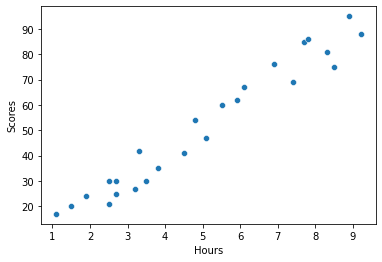

In [9]:
# Show the data on scatter plot
sns.scatterplot(x=Df['Hours'], y=Df['Scores'])

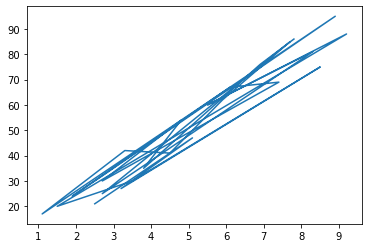

In [10]:
plt.plot(Df['Hours'], Df['Scores'])
plt.show()

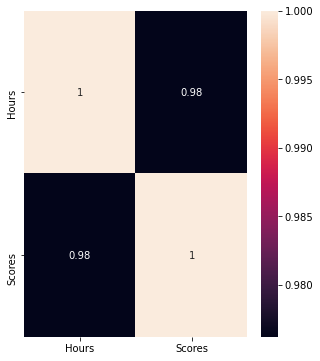

In [11]:
# Create heatmap for dataset.                          
plt.figure(figsize=(5,6))                            
cor = Df.corr()
sns.heatmap(cor, annot=True, fmt='.2g');

## Data modelling

In [12]:
# Create dependent and independent variable
X=Df.drop(['Scores'], axis=1)

In [13]:
y=Df['Scores']

In [14]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

## Apply machine learning model on data for prediction

In [16]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Apply linear regression model on data because our data is in the linear form
from sklearn.linear_model import LinearRegression

In [19]:
lir = LinearRegression() 

In [20]:
# Fit the linear regression model
lir.fit(X_train, y_train)

LinearRegression()

In [21]:
# Check score of the model.
lir.score(X_test, y_test)

0.9454906892105355

## Test the model prediction

In [22]:
# Predict the score if student study hours is 10 hours.
lir.predict([[9]])

array([91.21406837])

In [23]:
# Predict the score if student study hours is 10 hours.
lir.predict([[10]])

array([101.12472485])

In [24]:
# Predict the score if student study hours is 2.3 hours. 
lir.predict([[2.3]])

array([24.81266995])

## Model saving in pickle

In [25]:
# Here we save our model in pickle file using joblib library
import joblib as jbl

In [26]:
# Now, we are saving the model as a pickle in a file  
jbl.dump(lir, 'student_score.pkl')

['student_score.pkl']

In [27]:
# Here we load our model from pkl file using joblib
# Here, we are loading the model from the file  
lir = jbl.load('student_score.pkl')

In [28]:
# Here we predict our outputs using pkl file
# At last we will use the loaded pickled model for making predictions  
y_pred=lir.predict(X_test)

In [29]:
# Create a dataframe for the actual score and predicted scores
data = {'Actual score': y_test, 'Predicted score': y_pred}
df = pd.DataFrame(data)
display(df)

,Actual score,Predicted score
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Check the different errors of the model

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# Find mean squared error in the data.
print('Mean squared error = ',mean_squared_error(y_test, y_pred))

Mean squared error =  21.598769307217406


In [32]:
# Find r^2 score
from sklearn.metrics import r2_score
print('r^2 score error =',r2_score(y_test, y_pred))

r^2 score error = 0.9454906892105355


In [33]:
# Find max error in the data.
from sklearn.metrics import max_error
print('Max Error:',max_error(y_test, y_pred))

Max Error: 6.732260779489849


## Plot the final prediction of the model

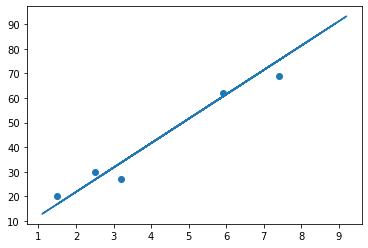

In [34]:
# Plotting the regression line
line = lir.coef_*X+lir.intercept_
# Plotting for the test data
plt.scatter(X_test, y_test)
plt.plot(X, line);
plt.show()